In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import helper_import_path
import model_builder_helper as mbh


 Including modules from  C:\Users\sidds\Documents\GitHub\DARPGHackathon\Code\word2vec


In [2]:
# read teh data from the 10179 selected rows
#all_original_data = pd.read_csv("./../Data/merged_eaol_original_10179.csv")
all_original_data = pd.read_csv("./../Data/merged_eaol_reduced_classes_30.csv")
y_colname = 'Apex_org_name'#'Parent_org_name' #

In [3]:
all_regs_for0 = all_original_data.loc[all_original_data['encoded_y'].apply(lambda x:x==0),'registration_no']

import random
random.seed(4)
#base_reg_list = set(all_original_data['registration_no']) # why EAOL since those are the tickets we are targetting.
regids_to_exclude = random.sample(set(all_regs_for0), 7500)

all_original_data = all_original_data.loc[all_original_data['registration_no'].apply(lambda x:x not in regids_to_exclude),:]


In [4]:
#all_original_data.shape
all_original_data.reset_index(inplace=True,drop=True)

In [5]:
all_original_data

,Unnamed: 0,action_name,action_srno,date_of_action,org_name,org_name2,registration_no,remarks,Parent_org_name,Apex_org_name,encoded_y,country_name,distname,state_name,subject_content
0,9,CASE DISPOSED OF,10,06-06-2019,Ministry of Labour and Employment,COMPLAINANT,AYUSH/E/2019/00300,In this grievance case the ESIC (as re...,['Department of Administrative Reforms and Pub...,Ministry of Labour and Employment,20,India,South Delhi,Delhi,Sir The ESIC dispensary in Jangpura new...
1,14,EXAMINED AT OUR LEVEL,5,08-05-2019,CGHS Delhi,CGHS Delhi,AYUSH/E/2019/00302,pl look into the matter.,['Director CGHS'],Department of Health & Family Welfare,7,India,South West Delhi,Delhi,Sir It is submitted that Bhagat Chandra Hosp...
2,24,CASE DISPOSED OF,6,27-05-2019,State Health Agency Jharkhand,COMPLAINANT,AYUSH/E/2019/00304,ईलाज का खर्चा आयुष्मान भारत.प्रधानमंत्री जन आ...,['Director B.N.'],Department of Health & Family Welfare,7,India,Ranchi,Jharkhand,Dear SirI am writing on the behalf of Bindu So...
3,29,EXAMINED AT OUR LEVEL,5,22-06-2019,all india instt of medical sciences,all india instt of medical sciences,AYUSH/E/2019/00327,Applicant has been intimated vide e-mail date...,['Health and Family Welfare'],Department of Health & Family Welfare,7,India,Alwar,Rajasthan,COMPLAINT AGAINS AIIMS STAFF AND FOR SOME HEL...
4,36,CASE DISPOSED OF,5,06-06-2019,SHA- Uttar Pradesh,COMPLAINANT,AYUSH/E/2019/00333,letter attached of the hospital with consent l...,['Director B.N.'],Department of Health & Family Welfare,7,India,Indore,Madhya Pradesh,Dear Sir My self Ashish kumar Ja...
5,42,EXAMINED AT OUR LEVEL,6,18-06-2019,CGHS Office East Zone,CGHS Office East Zone,AYUSH/E/2019/00336,,['CGHS Delhi'],Department of Health & Family Welfare,7,India,North West Delhi,Delhi,Siub : Complaint against Mis behavior by Mr Ja...
6,49,EXAMINED AT OUR LEVEL,5,27-06-2019,all india instt of medical sciences,all india instt of medical sciences,AYUSH/E/2019/00337,Applicant has been intimated vide e-mail date...,['Health and Family Welfare'],Department of Health & Family Welfare,7,India,Jodhpur,Rajasthan,I HAVE THREE TIMES REQUESTED TO AIIMS DELHI FO...
7,60,CASE DISPOSED OF,9,21-08-2019,Bureau - Central University,COMPLAINANT,AYUSH/E/2019/00338,University of Delhi has informed that the Uni...,['Department of Higher Education'],Department of Higher Education,8,India,Ghaziabad,Uttar Pradesh,Dear Sir I would like to draw your kind attent...
8,65,CASE DISPOSED OF,5,03-07-2019,SHA- Uttar Pradesh,COMPLAINANT,AYUSH/E/2019/00341,Letter sent to complainant,['Director B.N.'],Department of Health & Family Welfare,7,India,Maharajganj,Uttar Pradesh,सेवा में श्रीमान महोदय हम प्रार्थी को अल्सरेट...
9,70,EXAMINED AT OUR LEVEL,5,09-08-2019,Grnts Division,Grnts Division,AYUSH/E/2019/00485,Sir/Madam To provide financial assistance to ...,['Department of Health & Family Welfare'],Department of Health & Family Welfare,7,India,East Delhi,Delhi,Dear SirMera naam Amit Thapliyal hai. Hum log ...


In [6]:
all_original_data.columns
selected_columns = ['registration_no','encoded_y', 'country_name','state_name', 'subject_content',y_colname]

In [7]:
import random
random.seed(4)
base_reg_list = set(all_original_data['registration_no']) # why EAOL since those are the tickets we are targetting.
test_reg_list = random.sample(base_reg_list, 3000)
train_reg_list = list(set(all_original_data['registration_no'])-set(test_reg_list))
len(train_reg_list)

18865

#### Select and use train data

In [8]:
#Selected Columns 
train_reg_data = all_original_data.loc[all_original_data['registration_no'].apply(lambda x: x in train_reg_list),selected_columns]
train_reg_data.shape

(18865, 6)

In [9]:

print("Train Data, number of rows before drop na",train_reg_data.shape)
na_free = train_reg_data.dropna()
only_na = train_reg_data[~train_reg_data.index.isin(na_free.index)]
print("Train Data, number of rows After drop na",na_free.shape)

Train Data, number of rows before drop na (18865, 6)
Train Data, number of rows After drop na (18864, 6)


In [10]:
only_na

,registration_no,encoded_y,country_name,state_name,subject_content,Apex_org_name
3243,CBODT/E/2019/14161,0,Armenia,NaN,It would advisable to capture the entire infor...,Central Board of Direct Taxes (Income Tax)


In [11]:
train_reg_data.columns
train_reg_data.reset_index(inplace=True,drop=True)
train_reg_data.loc[0:0,:]

,registration_no,encoded_y,country_name,state_name,subject_content,Apex_org_name
0,AYUSH/E/2019/00302,7,India,Delhi,Sir It is submitted that Bhagat Chandra Hosp...,Department of Health & Family Welfare


In [12]:
print(train_reg_data.shape)

(18865, 6)


In [13]:
#print(len(data))

In [14]:
import nltk_helper_functions as nltk_helper
import word2vec_helper as w2v 
import pickle

# So now we have CountVectorizer, TF-IDF word, and TF-IDF n-grams level.
# use each of them tro preare 3 data sets, and use for training. 
# Assess what gives the best results. 
## Preprocess the subject content
data , special_words = nltk_helper.pre_process_text(train_reg_data)
technique='tfid' #,ngram, , count
max_features = 1000
print(len(data))
train_reg_data['subject_content'] = data
wordtovec_df, vectorizer, count_fit = w2v.get_wordtovec(data,train_reg_data,technique,col_name='subject_content',max_features=max_features)

#vectorizer.transform()


[nltk_data] Downloading package punkt to C:\Users\sidds/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sidds/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\sidds/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\sidds/nltk_data...
[nltk_data]   Package words is already up-to-date!


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [15]:
print(wordtovec_df.shape)
data_matrix = count_fit.fit_transform(data)


(18865, 400)


In [16]:
data_dense = data_matrix.todense()
#TODO: Confirm if higher is better -> looks like it.
#Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  5.485382984362576 %


In [17]:
train_reg_data.shape

(18865, 6)

In [18]:
col_names = ['country_name','state_name'] #'distname', 
# removed this since many of these values were NaN for test data and we had a limited set. 
#TODO*Check feature importance to select/deselect this in future.
for col_name in col_names:
    train_reg_data[col_name],label_encoder_y = mbh.get_encoded_values(train_reg_data[col_name].fillna('X'))
    # Persiting the encoder so, we can use it later to decode.
    with open("./../TrainedVectors/labelencoder_"+col_name+".pickle", "wb") as f:
        pickle.dump(label_encoder_y, f)

In [19]:
wordtovec_df[train_reg_data.columns] = train_reg_data.loc[:,:]

In [20]:
#train_reg_data['country_name']

In [21]:
print(wordtovec_df.shape)

#wordtovec_df.dropna(inplace=True)
#wordtovec_df.head()
print(wordtovec_df.columns)

(18865, 406)
Index(['accept', 'accord', 'account', 'act', 'action', 'actual', 'address',
       'adjust', 'aforesaid', 'age',
       ...
       'written', 'wrong', 'year', 'yet', 'registration_no', 'encoded_y',
       'country_name', 'state_name', 'subject_content', 'Apex_org_name'],
      dtype='object', length=406)


In [22]:
#train_reg_data.dropna(inplace=True)
## Selecting the x_columns
#print(train_reg_data.shape)
#print(train_reg_data.columns)
colnames = wordtovec_df.columns
y_column = 'encoded_y' #right now this controlled in the processing

x_y_cols = list(set(colnames) - set([y_colname,'registration_no','subject_content','distname']))
x_cols = list(set(x_y_cols) - set([y_column]))
#x_cols



In [20]:
#x_cols

In [21]:
# check causes of null
#wordtovec_df['encoded_y'][wordtovec_df['encoded_y'].apply(lambda x: x is np.NaN)]
#wordtovec_df['country_name'][wordtovec_df['country_name'].apply(lambda x: x is np.NaN)]
#dist_nan = wordtovec_df['distname'][wordtovec_df['distname'].apply(lambda x: x is np.NaN)]  # this one has NaN
#print(dist_nan.shape) #1313
#wordtovec_df['state_name'][wordtovec_df['state_name'].apply(lambda x: x is np.NaN)]
#subject_nan = wordtovec_df['subject_content'][wordtovec_df['subject_content'].apply(lambda x: x is np.NaN)]
#print(subject_nan.shape) #911

In [23]:
train_reg_data = wordtovec_df.loc[:,x_y_cols] #copy and not ref
print("Train Data, number of rows before drop na",train_reg_data.shape)
na_free = train_reg_data.dropna()
only_na = train_reg_data[~train_reg_data.index.isin(na_free.index)]
print("Train Data, number of rows After drop na",na_free.shape)

Train Data, number of rows before drop na (18865, 403)
Train Data, number of rows After drop na (18865, 403)


In [24]:
na_free.shape
#train_reg_data.reset_index(inplace=True,drop=True)
#train_reg_data.loc[0:0,:]

(18865, 403)

In [25]:
train_reg_data = na_free.loc[:,:]
#train_reg_data

In [26]:
#writing the file to CSV to save all the preprocessing steps for model training. 
train_reg_data.to_csv("./../Data/merged_eaol_processed_train_data.csv",index=False)

In [27]:
# commenting out the old dataframe and using the new one without int. 
X = train_reg_data[x_cols]
y = train_reg_data[y_column]
#X = X.loc[0:1000, :]
#y = y.loc[0:1000]
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test




#### Model Selection

A model with higher log-likelihood and lower perplexity (exp(-1. * log-likelihood per word)) is considered to be good. Let’s check for our model.

In [28]:
def get_lda_model(X,y):
    
    from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
    # Build LDA Model
    lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                          max_iter=10,               # Max learning iterations
                                          learning_method='online',   
                                          random_state=100,          # Random state
                                          batch_size=128,            # n docs in each learning iter
                                          evaluate_every = -1,       # compute perplexity every n iters, default: Don't
                                          n_jobs = -1,               # Use all available CPUs
                                         )
    lda_output = lda_model.fit_transform(X,y)

    print(lda_model)  # Model attributes
    from pprint import pprint
    # Log Likelyhood: Higher the better
    print("Log Likelihood: ", lda_model.score(X,y))

    # Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
    #this is giving some error
    #print("Perplexity: ", lda_model.perplexity(X,y))

    # See model parameters
    pprint(lda_model.get_params())
    return lda_model,lda_output

The most important tuning parameter for LDA models is n_components (number of topics). In addition, I am going to search learning_decay (which controls the learning rate) as well.

Besides these, other possible search params could be learning_offset (downweigh early iterations. Should be > 1) and max_iter. These could be worth experimenting if you have enough computing resources.

Be warned, the grid search constructs multiple LDA models for all possible combinations of param values in the param_grid dict. So, this process can consume a lot of time and resources.

In [29]:
def run_GSCV_lda(X,y):
    from sklearn.model_selection import GridSearchCV
    from pprint import pprint
    # Define Search Param
    search_params = {'n_components': [20, 25, 30], 'learning_decay': [.5, .7, .9]}

    # Init the Model
    lda = LatentDirichletAllocation()

    # Init Grid Search Class
    model = GridSearchCV(lda, param_grid=search_params)

    # Do the Grid Search
    return model.fit(X,y)

In [30]:
def run_decision_tree_model(X_train,y_train):
    print("Decision Tree Model")
    model = mbh.get_decision_tree_model(X_train,y_train)
    pred_train = mbh.get_prediction(model,X_train)
    pred_test = mbh.get_prediction(model,X_test)
    #Train Metrics
    mbh.get_metrics(pred_train,y_train,"Train")
    #Test Metrics
    mbh.get_metrics(pred_test,y_test,"Test")
    return model,y_test, pred_test



In [31]:
def run_random_forest_model(X_train,y_train):
    print("------------------------------------------------")
    print("Random Forest Model")
    model = mbh.get_randomforest_model(X_train,y_train)
    pred_train = mbh.get_prediction(model,X_train)
    pred_test = mbh.get_prediction(model,X_test)
    #Train Metrics
    mbh.get_metrics(pred_train,y_train,"Train")
    #Test Metrics
    mbh.get_metrics(pred_test,y_test,"Test")
    return model, y_test, pred_test

In [156]:
#adding code here for NB
def run_NaiveBayes_GS(X_train,y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.naive_bayes import MultinomialNB  
    
    clf = MultinomialNB()
    # using X_train_dtm (timing it with an IPython "magic command")

    %time clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    from sklearn import metrics
    print(metrics.accuracy_score(y_test, y_pred))
    return clf,y_test, y_pred
    

In [88]:
def run_GSCV_different_models(X_train,y_train):
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import classification_report
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier


    # Set the parameters by cross-validation for RF
    #print("using RF")
    #tuned_parameters = { 
    #    'n_estimators': [max_features],
    #    'max_features': ['auto', 'sqrt', 'log2'],
    #    'max_depth' : [8, 12],
    #    'criterion' :['gini', 'entropy']
    #}
    
    # Set the parameters by cross-validation for SVC
    print("using SVC")
    #tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
    #                 'C': [100, 1000]},
    #                {'kernel': ['linear'], 'C': [100, 1000]}]
    tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-4],
                     'C': [ 1000]}]
    #                {'kernel': ['linear'], 'C': [100, 1000]}]
    scores =  ['recall'] #['precision']#,
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        print('.',end='')
        clf = GridSearchCV(
            SVC(probability=True), tuned_parameters, scoring='%s_macro' % score, cv=2
        )
        #clf = GridSearchCV(
        #    RandomForestClassifier(random_state=42,class_weight="balanced"), tuned_parameters, scoring='%s_macro' % score, cv=5
        #)
        clf_fit = clf.fit(X_train, y_train)

        print("Best parameters set found on development set:")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(classification_report(y_true, y_pred))
        
        return clf,clf_fit,y_true, y_pred



In [148]:
#### In sections below uncomment and train the desired model and store the model object for predictions.

In [39]:
list(set(X_train.columns) - set(vectorizer.get_feature_names()))

['state_name', 'country_name']

In [40]:
#model, y_true, y_pred = run_random_forest_model(X_train,y_train)


In [280]:
model,y_true,y_pred = run_NaiveBayes_GS(X_train,y_train)


Wall time: 183 ms
0.5844522968197879


In [158]:
#model,clf_fit, y_true,y_pred = run_GSCV_different_models(X_train,y_train)

In [55]:
#print(get_confusion_metric(y_test, pred_test))

#below functions dont work good for multiclass problem, hence n0ot to be used.  
#print(get_auc_roc(model, X_test,y_test))
#get_false_true_positive_rates(model, X_test, y_test)

In [56]:
#cm = mbh.get_PyCM(y_test, pred_test)

In [281]:
import pickle 
filename = 'model_NB_0.pickle'
pickle.dump(model, open(filename, 'wb'))
#some time later...
 
#load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)



0.5844522968197879


In [315]:
y_test
with open("./../TrainedVectors/labelencoder_y.pickle", "rb") as f:
        label_encoder_y = pickle.load(f)
        y_labels = label_encoder_y.inverse_transform(y_test)


In [316]:
y_labels

array(['Department of Financial Services (Banking Division)',
       'Department of Financial Services (Banking Division)',
       'Central Board of Direct Taxes (Income Tax)', ...,
       'Central Board of Direct Taxes (Income Tax)',
       'Department of Financial Services (Banking Division)',
       'Government of Gujarat'], dtype=object)

In [261]:
#feat_imp = pd.DataFrame(
#            {
#                'feature': list(X_test.columns.values),
#                'importance': clf_fit.feature_importances_
#            }
#        )
#finding out important featuresand try to eliminate few later. 

#feat_imp.sort_values('importance', ascending=False).head(20)

### Predict on test data

In [319]:
test_reg_data = all_original_data.loc[all_original_data['registration_no'].apply(lambda x: x in test_reg_list),selected_columns]
test_reg_data.shape
test_reg_data.reset_index(inplace=True,drop=True)
test_reg_data.loc[0:15,:]

,registration_no,encoded_y,country_name,state_name,subject_content,Apex_org_name
0,AYUSH/E/2019/00300,20,India,Delhi,Sir The ESIC dispensary in Jangpura new...,Ministry of Labour and Employment
1,AYUSH/E/2019/00550,7,India,Uttar Pradesh,sir . Ayushman card jab Sharda hospital Noida...,Department of Health & Family Welfare
2,AYUSH/E/2019/00613,7,India,Andhra Pradesh,Matter pertains to CGHS Visakhapatnam :SirCGHS...,Department of Health & Family Welfare
3,AYUSH/E/2019/00662,24,India,West Bengal,I retired on ** Aug ****. My Pension Payment O...,Other
4,AYUSH/E/2019/00740,0,India,Delhi,Dear sirI have filed my revised income tax ret...,Central Board of Direct Taxes (Income Tax)
5,AYUSH/E/2019/00746,24,India,Tamilnadu,My son has passed plus* in CBSE Passed Biology...,Other
6,AYUSH/E/2019/00775,6,India,Rajasthan,MATTER RELATED TO UNION BANK OF INDIA CHANDIGA...,Department of Financial Services (Banking Divi...
7,AYUSH/E/2019/00793,9,India,Maharashtra,Dear sir*) SSC CGL (combined graduate level) ...,Department of Personnel and Training
8,AYUSH/E/2019/00902,6,India,Maharashtra,Respected sirI had given several times complai...,Department of Financial Services (Banking Divi...
9,CBODT/E/2019/07074,0,India,Tamilnadu,PAN application acknowledgment number ********...,Central Board of Direct Taxes (Income Tax)


In [263]:
#Preprocess data
import pickle
import nltk
import helper_import_path 
import nltk_helper_functions as nltk_helper

import word2vec_helper as w2v 
import numpy as np

with open("./../TrainedVectors/"+technique+"_vectorizer.pickle", "rb") as f:
    vectorizer = pickle.load(f) 



In [264]:
## Conclusion : removing distname as it is removing multiple roles ? Check if this was an important feature later.
#       'distname', 'state_name', 'subject_content'
#test_reg_data['encoded_y'][test_reg_data['encoded_y'].apply(lambda x: x is np.NaN)]
#test_reg_data['country_name'][test_reg_data['country_name'].apply(lambda x: x is np.NaN)]
#dist_nan = test_reg_data['distname'][test_reg_data['distname'].apply(lambda x: x is np.NaN)]  
#print(dist_nan.shape)# this one has NaN 40
#test_reg_data['state_name'][test_reg_data['state_name'].apply(lambda x: x is np.NaN)]
#test_reg_data['subject_content'][test_reg_data['subject_content'].apply(lambda x: x is np.NaN)]

In [265]:

#vectorizer.transform()
#Prediction code
vec = vectorizer.transform(test_reg_data['subject_content'] .apply(lambda x: " " if x is np.NaN else x))
pred_wordtovec_df = pd.DataFrame(vec.toarray(), columns=vectorizer.get_feature_names())  

In [320]:
#test_reg_data['country_name']
pred_wordtovec_df.shape
pred_wordtovec_df.head(15)

,accept,accord,account,act,action,actual,address,adjust,aforesaid,age,...,work,would,write,written,wrong,year,yet,state_name,country_name,encoded_y
0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,9,6,20
1,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,33,6,7
2,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,1,6,7
3,0.0,0.0,0.183275,0.000000,0.000000,0.0,0.260834,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.258218,35,6,24
4,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.298825,0.000000,9,6,0
5,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,30,6,24
6,0.0,0.0,0.000000,0.000000,0.091588,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,28,6,6
7,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.415966,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,19,6,9
8,0.0,0.0,0.115012,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.072103,0.0,0.0,0.0,0.0,0.027762,0.000000,19,6,6
9,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,30,6,0


In [267]:
# Handling nulls
null_columns=pred_wordtovec_df.apply(lambda x: 0 if x is np.NaN else x)
null_columns.shape
null_columns.head()

,accept,accord,account,act,action,actual,address,adjust,aforesaid,age,...,withdraw,within,without,work,would,write,written,wrong,year,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.183275,0.0,0.0,0.0,0.260834,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.258218
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298825,0.000000


In [268]:
#Replace nan by 0 Not sure if this is correct.
#print("Shape before replace NaN",pred_wordtovec_df.shape)
#wordtovec_df = wordtovec_df.replace(np.NaN, 0)
#print("Shape After replace NaN",pred_wordtovec_df.shape)

In [269]:
# Handling nulls

#inf_columns=np.isfinite(pred_wordtovec_df).all()
#print("Shape before replace -inf",pred_wordtovec_df.shape)
#wordtovec_df = wordtovec_df.replace(-np.Inf, 0)
#print("Shape after replace inf",pred_wordtovec_df.shape)
#pred_wordtovec_df.replace(np.Inf, 0)
#inf_columns=np.isfinite(pred_wordtovec_df).all()

In [270]:
#np.isfinite(pred_wordtovec_df).all()

In [271]:
import model_builder_helper as mbh
technique='tfid' #count,ngram
# Encoding values for the following 
col_names = ['country_name', 'state_name'] #'distname',
for col_name in col_names:
    # Read Persited encoder so, we can use it later to decode.
    with open("./../TrainedVectors/labelencoder_"+col_name+".pickle", "rb") as f:
        encoder = pickle.load(f)
        #test_reg_data[col_name] = encoder.transform(test_reg_data[col_name])
        test_reg_data[col_name] = test_reg_data[col_name].map(lambda s: '<unknown>' if s not in encoder.classes_ else s)
        encoder.classes_ = np.append(encoder.classes_, '<unknown>')
        test_reg_data[col_name] = encoder.transform(test_reg_data[col_name])

In [272]:
#test_reg_data[col_name]
columns_selected_eaol_data = list(set(test_reg_data.columns)-set(['registration_no', y_colname,'distname', 'subject_content']))
pred_wordtovec_df[columns_selected_eaol_data] = test_reg_data.loc[:,columns_selected_eaol_data]


In [273]:
pred_wordtovec_df.shape

(3000, 403)

In [274]:
#print(model.n_features_)
x_cols_pred = list(set(pred_wordtovec_df.columns)-set(['registration_no', y_colname,'distname', 'subject_content']))
print(len(x_cols_pred))
print(len(x_cols))
print("Shape of input vec ", pred_wordtovec_df.shape)

403
402
Shape of input vec  (3000, 403)


In [275]:
#print('registration_no' in x_cols_pred )
#print(set(x_cols_pred)-set(x_cols))
#print(x_cols)

In [276]:
print("Number of rows before dropping na",pred_wordtovec_df.shape)
#wordtovec_df.dropna(inplace=True)
na_free = pred_wordtovec_df.dropna()
only_na = pred_wordtovec_df[~pred_wordtovec_df.index.isin(na_free.index)]
#wordtovec_df.describe()
print("Number of rows After dropping na",na_free.shape)
#wordtovec_df[x_cols].head()

Number of rows before dropping na (3000, 403)
Number of rows After dropping na (3000, 403)


In [277]:
pred_wordtovec_df = na_free.loc[:,:]
print("Final pred DF shape",wordtovec_df.shape)

Final pred DF shape (18865, 406)


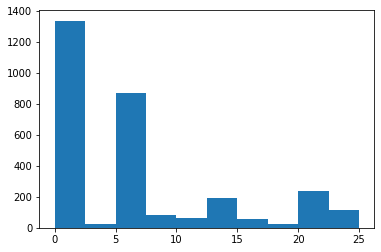

In [278]:

def plot_freq(merged_df,col_name='encoded_y'):
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.hist(merged_df[col_name])#,bins=len(merged_df['encoded_y'].value_counts()))
    plt.show()
plot_freq(pred_wordtovec_df)

In [304]:
#load the model from disk to do the prediction and scoring
filename = 'model_GSSVC_2_1.pickle'
model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)


0.5844522968197879


In [305]:
pred = mbh.get_prediction(model,pred_wordtovec_df[x_cols])
print(type(pred))
print("number of predicted values",len(pred))
pred = pred.astype(int)

<class 'numpy.ndarray'>
number of predicted values 3000


In [306]:
print(pred)

[19 19 23 ... 19 25 14]


In [307]:
with open("./../TrainedVectors/labelencoder_y.pickle", "rb") as f:
    encoder = pickle.load(f)
pred_labels = encoder.inverse_transform(pred)


C:\Users\sidds\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.21.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [308]:

actual_labels = encoder.inverse_transform(pred_wordtovec_df['encoded_y'].astype(int))

In [309]:
outcome = []
for index in range(0,len(pred_labels)):
    if actual_labels[index] in pred_labels[index]:
        outcome.append(1)
    else:
        outcome.append(0)
print(outcome)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

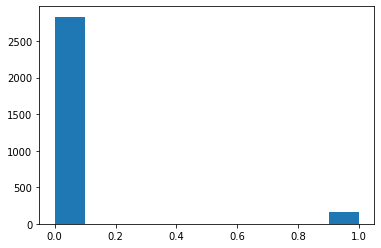

In [310]:
import matplotlib.pyplot as plt
plt.hist(outcome)
plt.show()

In [311]:
len(outcome)

3000

In [312]:
sum(outcome)

167

In [313]:
# Actual vs predicted values
prediction_df = pd.DataFrame()
prediction_df['actual_id'] = pred_wordtovec_df['encoded_y']
prediction_df['pred_id'] = pred
prediction_df["actuals"] = actual_labels
prediction_df["predicted"] = pred_labels

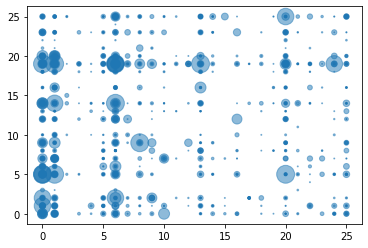

In [314]:
scatter_df = prediction_df.groupby(['actual_id','pred_id']).size().reset_index().rename(columns={0:'count'})
#print(scatter_df)
plt.scatter(prediction_df['actual_id'],prediction_df['pred_id'],s=scatter_df['count'],alpha=0.5)

##### The line along the diagonal represents the best fit line.
##### The points scattred on the graph show that right now the predictions are not very accurate.
##### Size of the bubble has been shown to show the number of values/count of each pred,actual pair.

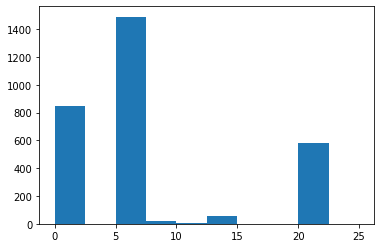

In [293]:
plot_freq(prediction_df,'pred_id')

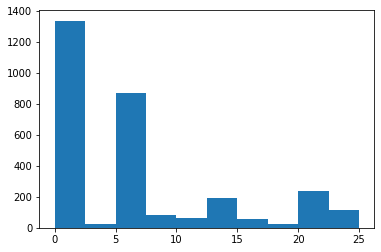

In [294]:
plot_freq(prediction_df,'actual_id')

In [295]:
not_most_common = prediction_df[prediction_df['actuals'] == 'Central Board of Direct Taxes (Income Tax)']

In [296]:
not_most_common

,actual_id,pred_id,actuals,predicted
4,0,20,Central Board of Direct Taxes (Income Tax),Ministry of Labour and Employment
9,0,0,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax)
10,0,6,Central Board of Direct Taxes (Income Tax),Department of Financial Services (Banking Divi...
11,0,1,Central Board of Direct Taxes (Income Tax),Central Board of Indirect Taxes and Customs
12,0,0,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax)
13,0,6,Central Board of Direct Taxes (Income Tax),Department of Financial Services (Banking Divi...
14,0,0,Central Board of Direct Taxes (Income Tax),Central Board of Direct Taxes (Income Tax)
15,0,6,Central Board of Direct Taxes (Income Tax),Department of Financial Services (Banking Divi...
16,0,5,Central Board of Direct Taxes (Income Tax),Department of Ex Servicemen Welfare
17,0,1,Central Board of Direct Taxes (Income Tax),Central Board of Indirect Taxes and Customs


In [297]:
#print(classification_report(y_true, y_pred))

#### Metrics for the model performance on blind data

In [325]:
from sklearn.metrics import classification_report
y_true, y_pred = pred_wordtovec_df['encoded_y'], model.predict(pred_wordtovec_df[x_cols])
print(classification_report(y_true, y_pred, output_dict=False))

report = classification_report(y_true, y_pred, output_dict=True)


              precision    recall  f1-score   support

           0       0.33      0.08      0.12       895
           1       0.19      0.06      0.09       432
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        11
           5       0.06      0.10      0.08       171
           6       0.16      0.01      0.03       676
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        57
           9       0.01      0.04      0.02        28
          10       0.00      0.00      0.00        37
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00        14
          13       0.16      0.03      0.05       162
          14       0.00      0.00      0.00        30
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        22
          17       0.00    

C:\Users\sidds\AppData\Local\Continuum\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [299]:
import sklearn
from sklearn.metrics import roc_auc_score
y_prob = model.predict_proba(X_test)
#print(y_true.shape, y_pred.shape)

print('The scikit-learn version is {}.'.format(sklearn.__version__))

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))



The scikit-learn version is 0.22.1.
One-vs-One ROC AUC scores:
0.508924 (macro),
0.548369 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.528015 (macro),
0.574194 (weighted by prevalence)


In [300]:
import pandas as pd
dict_root = dict()
macro_roc_auc_ovo = macro_roc_auc_ovo # replace this with your variable
weighted_roc_auc_ovo = weighted_roc_auc_ovo # replace this with your variable
dict_root['One-vs-One'] = dict({'macro':macro_roc_auc_ovo,
                                              'weighted_by_prevalence':weighted_roc_auc_ovo})
macro_roc_auc_ovr = macro_roc_auc_ovr # replace this with your variable
weighted_roc_auc_ovr = weighted_roc_auc_ovr # replace this with your variable
dict_root['One-vs-Rest'] = dict({'macro':macro_roc_auc_ovr,
                                              'weighted_by_prevalence':weighted_roc_auc_ovr})

roc_auc_df = pd.DataFrame(dict_root)
roc_auc_df
## Since the row names are not the same as existig csv you are saving...
## I suggest we put this as new csv file..like roc_report_+NAME+

,One-vs-One,One-vs-Rest
macro,0.508924,0.528015
weighted_by_prevalence,0.548369,0.574194


In [301]:
type(macro_roc_auc_ovo)

numpy.float64

In [302]:
for key, value in report.items():
    print(key)
print(report['accuracy'])
print(report['macro avg'])
print(report['weighted avg'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
accuracy
macro avg
weighted avg
0.24133333333333334
{'precision': 0.042573833221337565, 'recall': 0.05321267989010236, 'f1-score': 0.04316117992727872, 'support': 3000}
{'precision': 0.21626120402203208, 'recall': 0.24133333333333334, 'f1-score': 0.21016648246662825, 'support': 3000}


In [303]:

saved_report= pd.DataFrame.from_dict(report)
method = 'RF'
cv='5'
filename_pred = 'prediction_report_'+method+'_'+cv+'.csv'
filename_roc_auc = 'roc_auc_'+method+'_'+cv+'.csv'
print(filename)
saved_report.to_csv("./../reports/"+filename_pred)
prediction_df.to_csv('./../reports/pred_data_for_' +method+'_'+cv+'.csv' )
roc_auc_df.to_csv("./../reports/"+filename_roc_auc)

model_RF_5.pickle
